In [1]:
import numpy as np
import math
import pandas as pd
import sympy as sym
sym.init_printing()


class Game_theory:
    def __init__(self, tab, actions):
        self.actions = actions
        m = np.array(tab, dtype=[("x", object), ("y", object)])
        self.size = int(math.sqrt(len(tab)))
        self.scores = m.reshape(self.size, self.size)

    def Print_game(self):
        game = pd.DataFrame(np.nan, self.actions, self.actions, dtype=object)
        for i in range(self.size):
            for j in range(self.size):
                game.iat[i, j] = self.scores[i][j]
        print(game)

In [2]:
def compute_Nash(self):
    max_x = np.matrix(self.scores["x"].max(0)).repeat(self.size, axis=0)
    bool_x = self.scores["x"] == max_x
    max_y = np.matrix(self.scores["y"].max(1)).transpose().repeat(self.size, axis=1)
    bool_y = self.scores["y"] == max_y
    bool_x_y = bool_x & bool_y
    result = np.where(bool_x_y == True)
    position = list(zip(result[0], result[1]))
    return position

In [3]:
battle_of_the_sexes = [(4, 3), (2, 2), (1, 1), (3, 4)]
g = Game_theory(battle_of_the_sexes, ["Dog_race", "Ballet"])

# Position of the Nash equilibriums
position = compute_Nash(g)
print("The position of Nash equilibrium : ")
print(position)

print("The equilibrium events : ")
for event in position:
    print(g.actions[event[0]], g.actions[event[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for event in position:
    print(g.scores[event[0]][event[1]])

The position of Nash equilibrium : 
[(0, 0), (1, 1)]
The equilibrium events : 
Dog_race Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(3, 4)


# Dominant Stratergies

In [4]:
def getDominantStrategies(self, strict="True"):
    dominatedLines = []
    dominatedColumns = []
    findDominated = True
    while (
        findDominated
        and (len(dominatedLines) != self.size - 1)
        and (len(dominatedColumns) != self.size - 1)
    ):
        findDominated = False
        # dominated lines
        for i in range(self.size - 1):
            line1 = self.scores["x"][i]
            line2 = self.scores["x"][i + 1]
            if compare(self, line1, line2, dominatedColumns, strict):
                if i not in dominatedLines:
                    dominatedLines += [i]
                    findDominated = True
            if compare(self, line2, line1, dominatedColumns, strict):
                if i + 1 not in dominatedLines:
                    dominatedLines += [i + 1]
                    findDominated = True
        # dominated columns
        for i in range(self.size - 1):
            c1 = self.scores["y"].transpose()[i]
            c2 = self.scores["y"].transpose()[i + 1]
            if compare(self, c1, c2, dominatedLines, strict):
                if i not in dominatedColumns:
                    dominatedColumns += [i]
                    findDominated = True
            if compare(self, c2, c1, dominatedLines, strict):
                if i + 1 not in dominatedColumns:
                    dominatedColumns += [i + 1]
                    findDominated = True
    return result(self, dominatedLines, dominatedColumns)


def compare(self, l1, l2, tab, strict):
    dominated = True
    for i in range(self.size):
        if strict:
            if (l1[i] < l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
        else:
            if (l1[i] <= l2[i] and i not in tab) or i in tab:
                dominated = dominated and True
            else:
                dominated = dominated and False
    return dominated


def result(self, dominatedLines, dominatedColumns):
    x = list()
    y = list()
    res = list()

    for i in range(self.size):
        if i not in dominatedLines:
            x.append(i)
        if i not in dominatedColumns:
            y.append(i)

    for indX in x:
        for indY in y:
            res.append((indX, indY))
    return res


In [5]:

# We recover the indexes of the non-dominated strategy(ies):
print("Strongly dominated strategies method")
listOfCoordinates = getDominantStrategies(g)
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(g.actions[cor[0]], g.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(g.scores[cor[0]][cor[1]])

print(" ")

# We recover the indexes of the non-dominated strategy(ies)::
print("Weakly dominated strategies method")
listOfCoordinates = getDominantStrategies(g, strict="False")
print("Non-dominated strategies indexes : ")
print(listOfCoordinates)

# We print the moves corresponding to these strategies
print("The corresponding rounds : ")
for cor in listOfCoordinates : 
    print(g.actions[cor[0]], g.actions[cor[1]])

# We print the corresponding scores
print("The corresponding scores : ")
for cor in listOfCoordinates : 
    print(g.scores[cor[0]][cor[1]])

Strongly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)
 
Weakly dominated strategies method
Non-dominated strategies indexes : 
[(0, 0), (0, 1), (1, 0), (1, 1)]
The corresponding rounds : 
Dog_race Dog_race
Dog_race Ballet
Ballet Dog_race
Ballet Ballet
The corresponding scores : 
(4, 3)
(2, 2)
(1, 1)
(3, 4)


# Mixed Strategies

In [6]:
x, y  = sym.symbols('x, y')
a_11, a_12, a_21, a_22 = sym.symbols('a_11. a_12, a_21, a_22')
b_11, b_12, b_21, b_22 = sym.symbols('b_11, b_12, b_21, b_22')

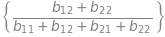

In [7]:
sym.solveset(y * (b_11 + b_21) -((1-y) * (b_12 + b_22)), y)

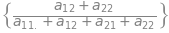

In [8]:
sym.solveset(x * (a_11 + a_21) -((1-x) * (a_12 + a_22)), x)